In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad, dblquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Buitrago Díaz
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






La integral usando el método de simpson es: 1.5921613003929909
La integral usando el método trapezoidal es: 1.6069077219449923


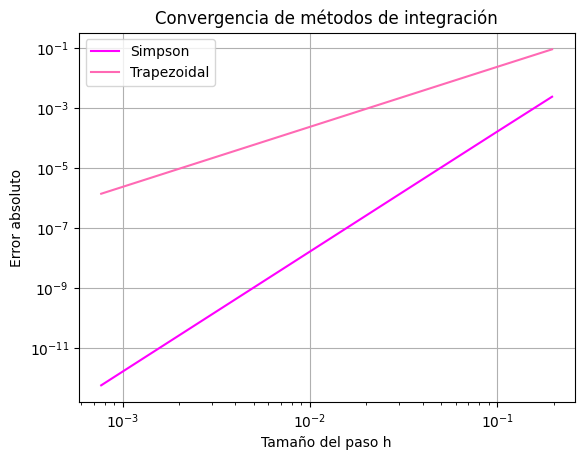

In [2]:
a = 0
b = np.pi/4
f = lambda x: np.exp(3*x)*np.sin(x)
n = 10
h = (b-a)/n
x = np.arange(a, b+h, h)
y = f(x)
itg, err = quad(f, a, b)

int_simp = simpson(y, x)
int_trap = trapezoid(y, x)
print(f'La integral usando el método de simpson es: {int_simp}')
print(f'La integral usando el método trapezoidal es: {int_trap}')

nvals = 2 ** np.arange(2, 11)
H = []
err_s = []
err_t = []

for i in nvals:
    h= (b-a)/i
    x = np.linspace(a, b, i+1)
    y= f(x)
    int_s= simpson(y, x)
    int_t= trapezoid(y, x)
    error_sn= abs(itg - int_s)
    error_tn= abs(itg - int_t)
    H.append(h)
    err_s.append(error_sn)
    err_t.append(error_tn)

plt.loglog(H, err_s, color="magenta", label='Simpson')
plt.loglog(H, err_t, color="hotpink", label='Trapezoidal')
plt.xlabel('Tamaño del paso h')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos de integración')
plt.legend()
plt.grid()
plt.show()

La integral usando el método de simpson es: 0.2725141807832368
La integral usando el método trapezoidal es: 0.2726585180886653


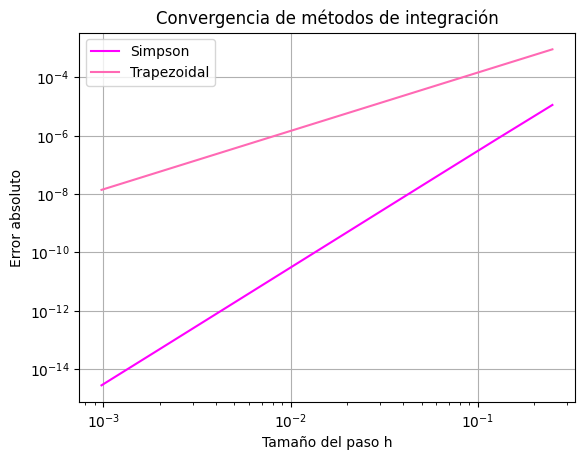

In [3]:
a= np.e
b= 1+np.e
f= lambda x: 1/(x*np.log(x))
n = 10
h = (b-a)/n
x = np.arange(a, b+h, h)
y = f(x)
itg, err = quad(f, a, b)

int_simp = simpson(y, x)
int_trap = trapezoid(y, x)
print(f'La integral usando el método de simpson es: {int_simp}')
print(f'La integral usando el método trapezoidal es: {int_trap}')


nvals = 2 ** np.arange(2, 11)
H = []
err_s = []
err_t = []

for n in nvals:
    h= (b-a)/n
    x = np.linspace(a, b, n+1)
    y= f(x)
    int_s= simpson(y, x)
    int_t= trapezoid(y, x)
    error_sn= abs(itg - int_s)
    error_tn= abs(itg - int_t)
    H.append(h)
    err_s.append(error_sn)
    err_t.append(error_tn)


plt.loglog(H, err_s, color="magenta",label='Simpson')
plt.loglog(H, err_t, color="hotpink",label='Trapezoidal')
plt.xlabel('Tamaño del paso h')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos de integración')
plt.legend()
plt.grid()
plt.show()

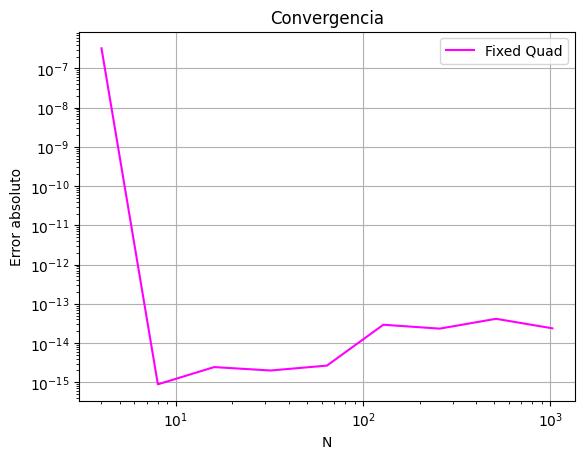

In [4]:
a = 0
b = np.pi/4
f = lambda x: np.exp(3*x)*np.sin(x)
itg, _ = quad(f, a, b)

nvals = 2**np.arange(2, 11)
err_f = []

for n in nvals:
    res, _ = fixed_quad(f, a, b, n=n)
    err = abs(itg - res)
    err_f.append(err)

plt.loglog(nvals, err_f, color="magenta", label='Fixed Quad')
plt.xlabel('N')
plt.ylabel('Error absoluto')
plt.title('Convergencia')
plt.legend()
plt.grid()
plt.show()

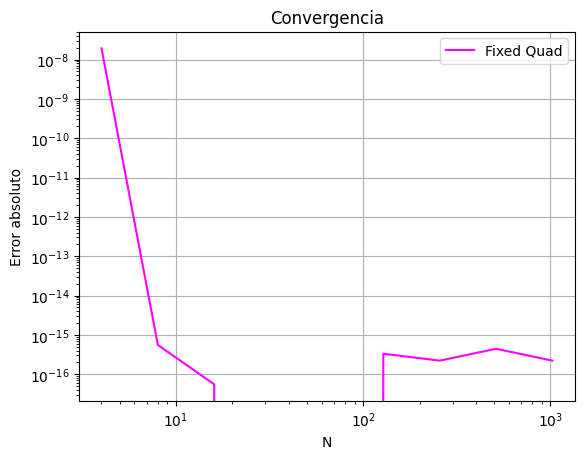

In [5]:
a= np.e
b= 1+np.e
f= lambda x: 1/(x*np.log(x))

itg, _ = quad(f, a, b)

err_f = []

for n in nvals:
    res, _ = fixed_quad(f, a, b, n=n)
    err = abs(itg - res)
    err_f.append(err)

plt.loglog(nvals, err_f, color="magenta", label='Fixed Quad')
plt.xlabel('N')
plt.ylabel('Error absoluto')
plt.title('Convergencia')
plt.legend()
plt.grid()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [6]:
def integral_mas_interna(y, x):
  integrando = lambda z: (1/y)*np.sin(z/y)
  resultado, _ = quad(integrando, 0, x*y)
  return resultado

def integral_intermedia(x):
  integrando = lambda y: integral_mas_interna(y, x)
  resultado, _ = quad(integrando, 0, x)
  return resultado

resultado_triple_quad, error_triple_quad = quad(integral_intermedia, 0, np.pi)
print(f'La integral usando solo quad es: {resultado_triple_quad}')

f=lambda z, y, x: (1/y)*np.sin(z/y)
res,err= tplquad(f, 0, np.pi, lambda x: 0, lambda x: x, lambda x, y: 0, lambda x, y: x*y)
print(f'La integral usando tplquad es: {res}')

#Ambos metodos arrojan el mismo resultado

La integral usando solo quad es: 6.934802200544679
La integral usando tplquad es: 6.934802200544679


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [7]:
def gauss_quad_standard(func, a, b,n):
  '''
  Calcula la integral de una función en el intervalo [a, b]
  usando cuadratura gaussiana.

  Parameters:
  - a: Límite inferior del intervalo
  - b: Límite superior del intervalo
  - func: La función a integrar
  - n: Número de puntos para la cuadratura (grado del polinomio de Legendre)

  Salidas:
  - Aproximación de la integral

  '''
  x, w = roots_legendre(n)
  t =((b-a)/2)*x+(b+a)/2
  integral = ((b-a)/2) * np.sum(w * func(t))
  return integral

In [8]:
def integral_interna(y, x, n=1000):
  integrando = lambda z: 1/y*np.sin(z/y)
  resultado= gauss_quad_standard(integrando, 0, x*y,n)
  return resultado

def integral_intermedia(x, n=1000):
  integrando = lambda y: integral_interna(y, x)
  resultado = gauss_quad_standard(integrando, 0, x, n)
  return resultado

res= gauss_quad_standard(integral_intermedia, 0, np.pi, n=1000)
print(f'La integral usando Gauss_Quad es: {res}')

La integral usando Gauss_Quad es: 9.107331966335584


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [16]:
def itg_gauss(f, a, b, eps=1e-5):
    n = 10
    itg_0 = 0
    while True:
      itg_1, _ = fixed_quad(f, a, b, n=n)
      if abs(itg_1 - itg_0) < eps:
          break
      else:
        itg_0 = itg_1
        n += 1
    return itg_1

def itg_simp(f, a, b, eps=1e-5):
    itg_0=0
    n = 10
    while True:
      x = np.linspace(a, b, n)
      y = f(x)
      itg_1 = simpson(y,x)
      if abs(itg_1 - itg_0) < eps:
          break
      else:
        itg_0 = itg_1
        n += 1
    return itg_1

def itg_trap(f, a, b, eps=1e-5):
    itg_0=0
    n = 10
    while True:
      x = np.linspace(a, b, n)
      y = f(x)
      itg_1 = trapezoid(y,x)
      if abs(itg_1 - itg_0) < eps:
          break
      else:
        itg_0 = itg_1
        n += 1
    return itg_1

In [17]:
a = 1e-5
b = (np.pi/2)+1e-5
f = lambda x: 1/np.sqrt(np.tan(x))
gaus = itg_gauss(f, a, b)
print(f'La integral usando el metodo de gauss es: {gaus}')

La integral usando el metodo de gauss es: 2.2142996025574546


In [ ]:
a = 1e-5
b = (np.pi/2)+1e-5
f = lambda x: 1/np.sqrt(np.tan(x))
simp = itg_simp(f, a, b)
print(f'La integral usando el metodo de simpson es: {simp}')

In [ ]:
a = 1e-5
b = (np.pi/2)+1e-5
f = lambda x: 1/np.sqrt(np.tan(x))
trap = itg_trap(f, a, b)
print(f'La integral usando el metodo de gauss es: {trap}')